# CLEANING

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing data as dataframe for cleaning exercise

In [2]:
df = pd.read_csv("1S-1X log.csv")
display(df)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,91.4400,-999.2500,17.0387,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
1,91.5924,-999.2500,16.6233,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
2,91.7448,-999.2500,16.0359,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
3,91.8972,-999.2500,15.2310,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
4,92.0496,-999.2500,14.9397,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
...,...,...,...,...,...,...,...,...,...,...,...,...
23330,3646.9320,8.7959,120.8450,-999.25,-999.25,-999.25,-999.25,-999.25,0.2351,2.5498,-999.25,13.7028
23331,3647.0844,8.5674,120.2273,-999.25,-999.25,-999.25,-999.25,-999.25,0.2411,2.5665,-999.25,13.4578
23332,3647.2368,8.4531,116.5244,-999.25,-999.25,-999.25,-999.25,-999.25,0.2475,2.5728,-999.25,9.9158
23333,3647.3892,8.4739,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,0.2509,2.5595,-999.25,-999.2500


## log interpretation

<ul>
    <li>ILD (induction resistivity log) is recommended for holes drilled with only moderately conductive drilling muds or nonconductive muds (eg. oil-based muds).</li>
    <li>LLD (laterolog resistivity log deep) is recommended for holes drilled with highly conductive muds. (eg. salt muds). It measures resistivity away from the well bore.</li>
    <li>LLS (laterolog resistivity log shallow) is recommended for holes drilled with highly conductive muds. (eg. salt muds). It measures resistivity close to the well bore.</li>
    <li>MSFL (micro-spherical focused log) measures the resistivity in the flash zone.</li>
    <li>SFL (Spherical Focused log): It increases from right to left</li>
    <li>ITT (Interval Transit Time - sonic log): It increases from right to left</li>
</ul>







## Each log plot against depth

#### log plot of 4 Tracks 

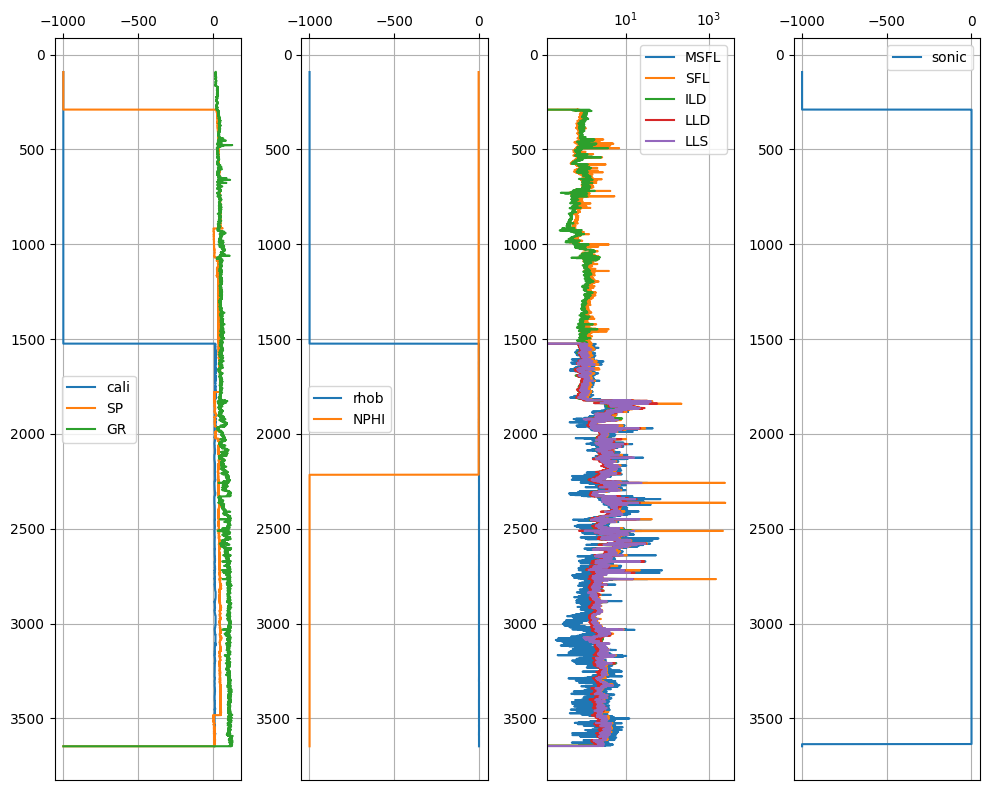

In [13]:
#create a figure and two subplots 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 8))


#plot the first graph
ax1.plot(df['CALI'], df['DEPTH'], label = 'cali')
ax1.plot(df['SP'], df['DEPTH'], label = 'SP')
ax1.plot(df['GR'], df['DEPTH'], label = 'GR')
ax1.grid(True)
ax1.legend()
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.invert_yaxis()
#ax1.set_title('Cali against depth')

#plot the second graph
ax2.plot(df['RHOB'], df['DEPTH'], label = 'rhob')
ax2.plot(df['NPHI'][::-1], df['DEPTH'], label = 'NPHI')
ax2.grid(True)
ax2.legend()
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.invert_yaxis()
#ax2.set_title('GR against depth')

#third plot
ax3.plot(df['MSFL'], df['DEPTH'], label = 'MSFL')
ax3.plot(df['SFL'], df['DEPTH'], label = 'SFL')
ax3.plot(df['ILD'], df['DEPTH'], label = 'ILD')
ax3.plot(df['LLD'], df['DEPTH'], label = 'LLD')
ax3.plot(df['LLS'], df['DEPTH'], label = 'LLS')
ax3.set_xscale('log')
ax3.grid(True)
ax3.legend()
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position('top')
ax3.invert_yaxis()
#ax3.set_title('SP against depth')

#fourth plot
ax4.plot(df['ITT'], df['DEPTH'], label = 'sonic')
ax4.grid(True)
ax4.legend()
ax4.xaxis.set_ticks_position('top')
ax4.xaxis.set_label_position('top')
ax4.invert_yaxis()

#display the figure
plt.tight_layout()
plt.show()


## The Concept behind data cleaning

Noise reduction is an important step in data cleaning because it; Enhances Data Accuracy, Improves Data Consistency, Eliminates Unwanted Variations, Reveals Underlying Trends and Patterns and Facilitates Reliable Model Building.

Overall, noise reduction is vital in data cleaning as it helps improve data quality, consistency, and accuracy. By removing or mitigating noise, you can uncover the true patterns and relationships in the data, leading to more reliable insights and decisions.


### Techniques

Noise reduction can be achieved through various techniques depending on the nature of the noise and the characteristics of the data. Of all techniques, two were used:

Filtering Techniques:
   - Moving Average: A simple technique where each data point is replaced by the average of its neighboring values within a specified window.

Statistical Techniques:
   - Z-Score or Outlier Detection: Identifies data points that deviate significantly from the mean using z-scores or other statistical measures and removes them as outliers.
  

### Moving Average or mean

.rolling(window=5, min_periods=1, center=True): This sets up a rolling window calculation with a window size of 5. The window parameter determines the number of consecutive values to consider for each calculation. In this case, it takes the current value and the two values on each side. The min_periods parameter specifies the minimum number of non-null values required to calculate a value. The center parameter specifies that the rolling window should be centered, meaning the resulting value will be assigned to the middle point of the window.

.mean(): This calculates the mean (average) value within each rolling window. The rolling window moves through the 'GR' column, and at each position, it calculates the mean value of the data points within the window.

In [6]:
#Re-aassigning dataFrame
df1 = df.copy()

# Apply moving average filter
df1['CALI'] = df1['CALI'].rolling(window=5, min_periods=1, center=True).mean()
df1['GR'] = df1['GR'].rolling(window=5, min_periods=1, center=True).mean()
df1['ILD'] = df1['ILD'].rolling(window=5, min_periods=1, center=True).mean()
df1['ITT'] = df1['LLD'].rolling(window=5, min_periods=1, center=True).mean()
df1['LLS'] = df1['LLS'].rolling(window=5, min_periods=1, center=True).mean()
df1['MSFL'] = df1['MSFL'].rolling(window=5, min_periods=1, center=True).mean()
df1['NPHI'] = df1['NPHI'].rolling(window=5, min_periods=1, center=True).mean()
df1['RHOB'] = df1['RHOB'].rolling(window=5, min_periods=1, center=True).mean()
df1['SFL'] = df1['SFL'].rolling(window=5, min_periods=1, center=True).mean()
df1['SP'] = df1['SP'].rolling(window=5, min_periods=1, center=True).mean()
print('Original Data')
display(df)
print('Noise Reduced Data')
display(df1)



Original Data


,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,91.4400,-999.2500,17.0387,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
1,91.5924,-999.2500,16.6233,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
2,91.7448,-999.2500,16.0359,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
3,91.8972,-999.2500,15.2310,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
4,92.0496,-999.2500,14.9397,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
...,...,...,...,...,...,...,...,...,...,...,...,...
23330,3646.9320,8.7959,120.8450,-999.25,-999.25,-999.25,-999.25,-999.25,0.2351,2.5498,-999.25,13.7028
23331,3647.0844,8.5674,120.2273,-999.25,-999.25,-999.25,-999.25,-999.25,0.2411,2.5665,-999.25,13.4578
23332,3647.2368,8.4531,116.5244,-999.25,-999.25,-999.25,-999.25,-999.25,0.2475,2.5728,-999.25,9.9158
23333,3647.3892,8.4739,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,0.2509,2.5595,-999.25,-999.2500


Noise Reduced Data


,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,91.4400,-999.250000,16.565967,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.25,-999.25000
1,91.5924,-999.250000,16.232225,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.25,-999.25000
2,91.7448,-999.250000,15.973720,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.25,-999.25000
3,91.8972,-999.250000,15.510020,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.25,-999.25000
4,92.0496,-999.250000,15.103280,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.25,-999.25000
...,...,...,...,...,...,...,...,...,...,...,...,...
23330,3646.9320,8.709640,120.272660,-999.25,-999.25,-999.25,-999.25,-999.25,0.237480,2.552120,-999.25,11.81878
23331,3647.0844,8.631920,-103.979240,-999.25,-999.25,-999.25,-999.25,-999.25,0.240780,2.556480,-999.25,-190.17236
23332,3647.2368,8.557720,-328.180660,-999.25,-999.25,-999.25,-999.25,-999.25,0.244360,2.558900,-999.25,-392.28472
23333,3647.3892,8.498175,-440.437075,-999.25,-999.25,-999.25,-999.25,-999.25,0.246675,2.561175,-999.25,-493.78160


### Outlier Detection

In this illustration, the .all(axis=1) method is used to check if all values in each row are non-negative. The rows where this condition is true are retained in the DataFrame, effectively removing rows with negative numbers.

In [38]:
# remove outliers
# Remove rows containing negative numbers
df2 = df1[(df1 >= 0).all(axis=1)]
display(df2)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
9402,1524.3048,13.99388,56.85926,0.94872,0.97256,0.9823,1.05480,1.40540,0.43650,2.25416,1.15598,39.19920
9403,1524.4572,13.88354,57.50612,0.93834,0.95780,0.9660,1.04180,1.37098,0.43420,2.26058,1.13028,38.87880
9404,1524.6096,13.85660,58.16200,0.93218,0.94112,0.9360,1.02614,1.33098,0.43578,2.26280,1.10818,38.59616
9405,1524.7620,13.92352,58.56224,0.93368,0.92422,0.9141,1.00782,1.30812,0.43524,2.26252,1.09128,38.50654
9406,1524.9144,14.00978,58.53394,0.94452,0.90826,0.9072,1.00402,1.31098,0.42982,2.26336,1.08554,38.54836
...,...,...,...,...,...,...,...,...,...,...,...,...
23306,3643.2744,8.93338,118.47564,1.98666,2.16862,2.1778,2.52528,3.08590,0.23242,2.49050,2.65440,9.97266
23307,3643.4268,8.90244,117.93208,1.97404,2.20326,2.2251,2.60182,3.07928,0.22996,2.50684,2.58424,10.45992
23308,3643.5792,8.86802,118.16376,1.96236,2.22612,2.2370,2.69148,3.03250,0.22920,2.52322,2.52098,10.69904
23309,3643.7316,8.84944,119.51422,1.95424,2.23670,2.2489,2.77510,2.98466,0.22946,2.53436,2.46634,10.85524


## Each log plot against depth

### log of 4 tracks

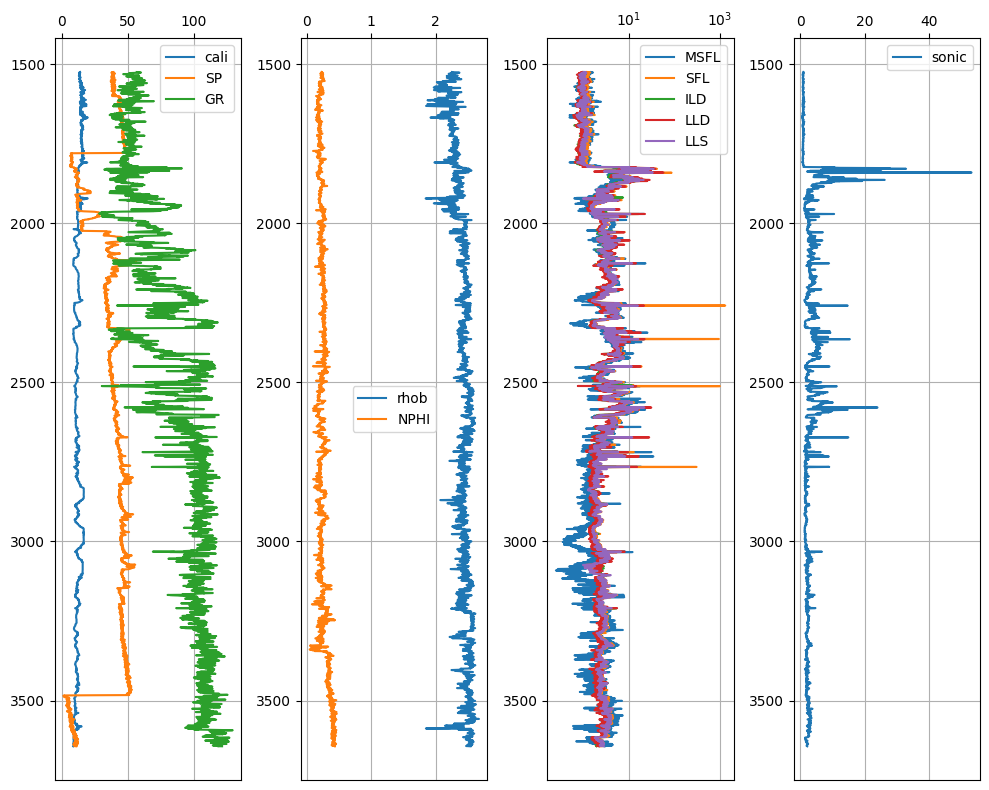

In [39]:

#create a figure and two subplots 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 8))


#plot the first graph
ax1.plot(df2['CALI'], df2['DEPTH'], label = 'cali')
ax1.plot(df2['SP'], df2['DEPTH'], label = 'SP')
ax1.plot(df2['GR'], df2['DEPTH'], label = 'GR')
ax1.grid(True)
ax1.legend()
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.invert_yaxis()
#ax1.set_title('Cali against depth')

#plot the second graph
ax2.plot(df2['RHOB'], df2['DEPTH'], label = 'rhob')
ax2.plot(df2['NPHI'][::-1], df2['DEPTH'], label = 'NPHI')
ax2.grid(True)
ax2.legend()
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.invert_yaxis()
#ax2.set_title('GR against depth')

#third plot
ax3.plot(df2['MSFL'], df2['DEPTH'], label = 'MSFL')
ax3.plot(df2['SFL'], df2['DEPTH'], label = 'SFL')
ax3.plot(df2['ILD'], df2['DEPTH'], label = 'ILD')
ax3.plot(df2['LLD'], df2['DEPTH'], label = 'LLD')
ax3.plot(df2['LLS'], df2['DEPTH'], label = 'LLS')
ax3.set_xscale('log')
ax3.grid(True)
ax3.legend()
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position('top')
ax3.invert_yaxis()
#ax3.set_title('SP against depth')

#fourth plot
ax4.plot(df2['ITT'], df2['DEPTH'], label = 'sonic')
ax4.grid(True)
ax4.legend()
ax4.xaxis.set_ticks_position('top')
ax4.xaxis.set_label_position('top')
ax4.invert_yaxis()

#display the figure
plt.tight_layout()
plt.show()


## END OF CODE